In [30]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
from scipy import optimize
from scipy import stats
plt.style.use(r"/home/vladimir/BOTAY!/Labs/jupyter_template/style.mplstyle")

### Ток фотоприёмника в зависимости от тока накачки лазера/светодиода

<>:14: SyntaxWarning: invalid escape sequence '\m'
<>:16: SyntaxWarning: invalid escape sequence '\m'
<>:14: SyntaxWarning: invalid escape sequence '\m'
<>:16: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_101066/1284357876.py:14: SyntaxWarning: invalid escape sequence '\m'
  plt.plot(x_line, y_line, label = r'Аппроксимация $I = I_{0} \cdot \frac{P_{накачки}}{P_{накачки} + P_{насыщ}}$' + f'\n$I_0 = {param[0]:.2f} \mu A, P_{{насыщ}} = {param[1]:.2f} мВт$')
/tmp/ipykernel_101066/1284357876.py:16: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel("Ток, текущий\nчерез фотоприёмник $[\mu A] \propto J$")


[ 64.76300336 173.60590175]


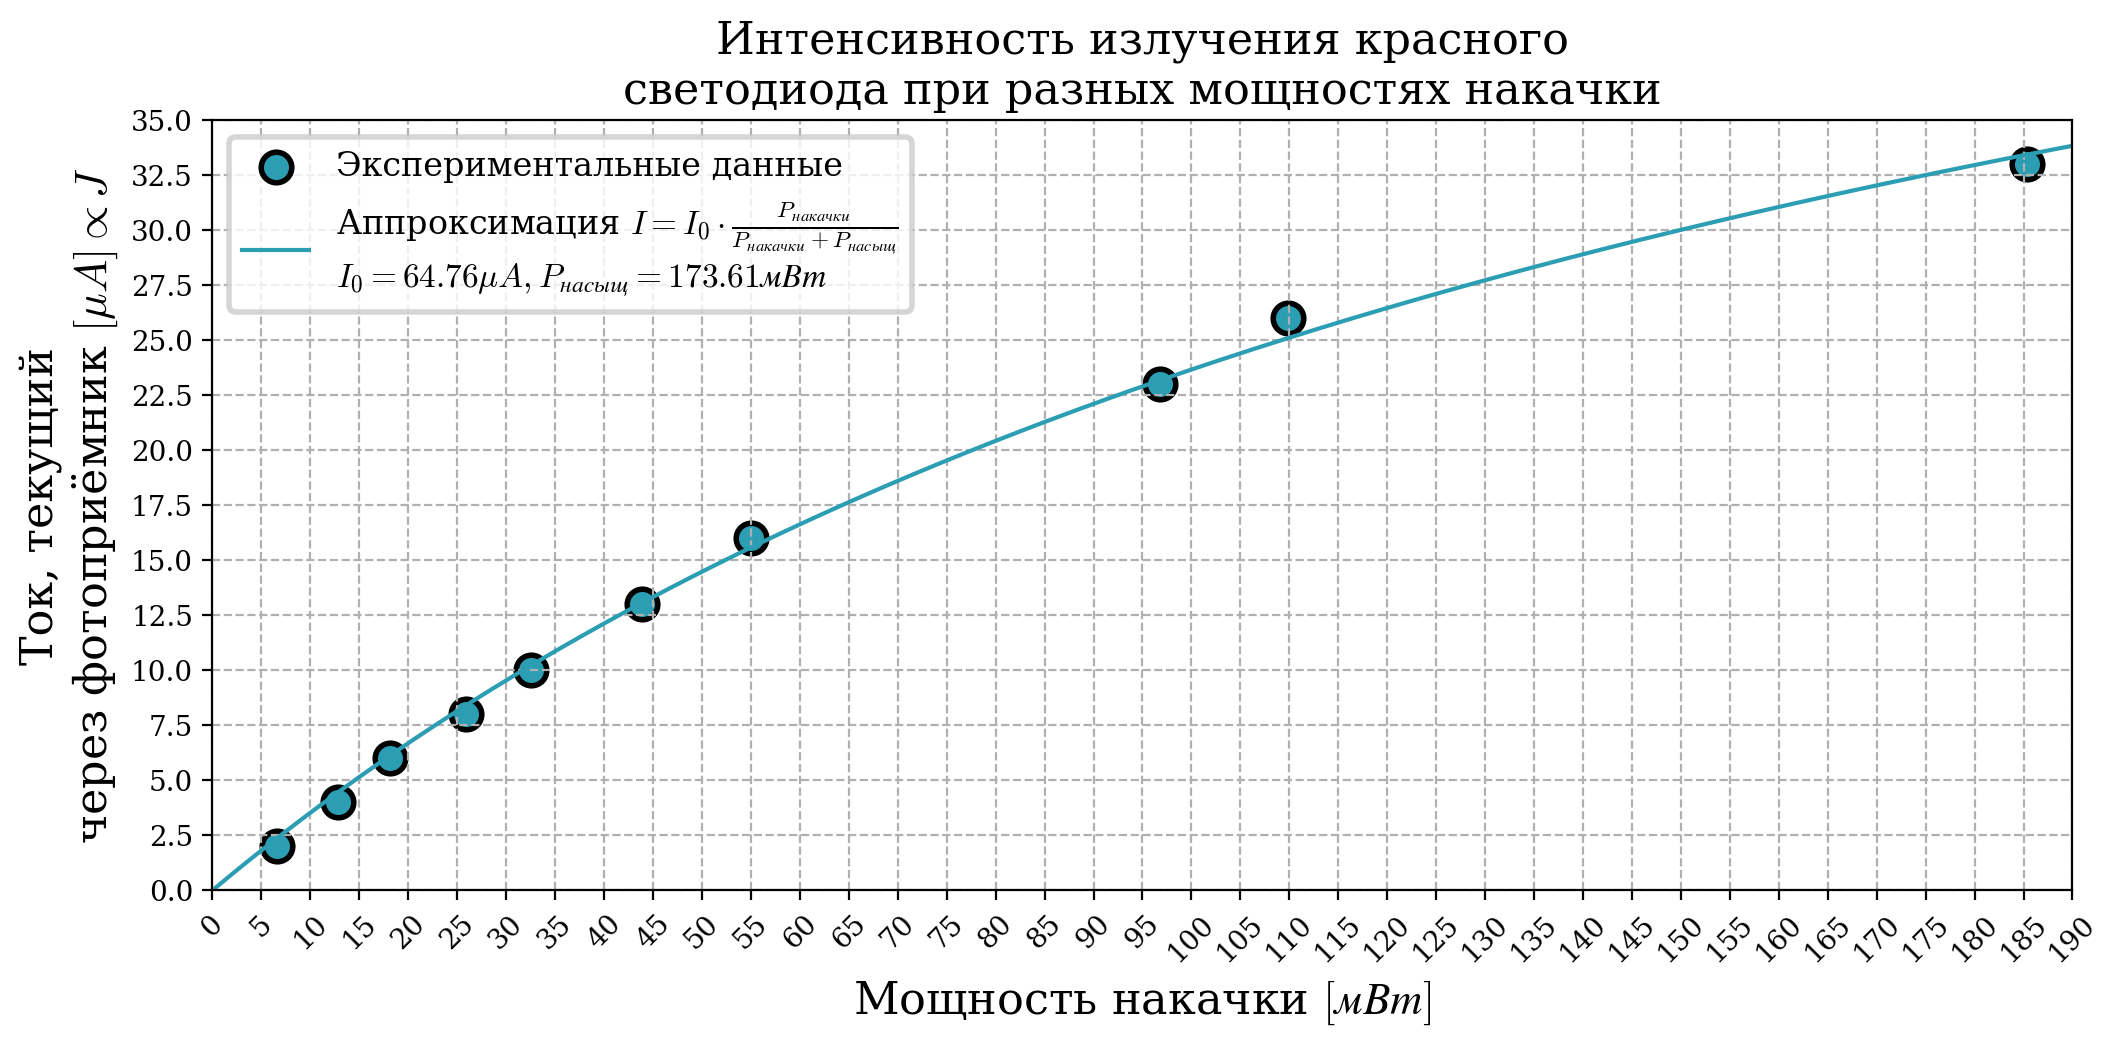

In [31]:
data = pd.read_csv(r"intensity_by_pump/red.csv")
P = data['Ipump[mA]'] * data['Upump[V]']


f = lambda x, I_o, P_s: I_o * x / (x + P_s) 
param, _ = optimize.curve_fit(f, P, data['Iph[uA]'])
print(param)

x_line = np.linspace(0, 200, 1000)
y_line = f(x_line, *param)


plt.scatter(P, data['Iph[uA]'], label = 'Экспериментальные данные')
plt.plot(x_line, y_line, label = r'Аппроксимация $I = I_{0} \cdot \frac{P_{накачки}}{P_{накачки} + P_{насыщ}}$' + f'\n$I_0 = {param[0]:.2f} \mu A, P_{{насыщ}} = {param[1]:.2f} мВт$')
plt.xlabel(r"Мощность накачки $[мВт]$")
plt.ylabel("Ток, текущий\nчерез фотоприёмник $[\mu A] \propto J$")
plt.title("Интенсивность излучения красного\nсветодиода при разных мощностях накачки")


plt.xticks(np.arange(0, 200, 5), rotation = 45)
plt.xlim(0, 190)

plt.yticks(np.arange(0, 40, 2.5))
plt.ylim(0, 35)

plt.legend()

plt.savefig("red_vc.png", bbox_inches = 'tight')

<>:14: SyntaxWarning: invalid escape sequence '\c'
<>:14: SyntaxWarning: invalid escape sequence '\m'
<>:16: SyntaxWarning: invalid escape sequence '\m'
<>:14: SyntaxWarning: invalid escape sequence '\c'
<>:14: SyntaxWarning: invalid escape sequence '\m'
<>:16: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_101066/1274997823.py:14: SyntaxWarning: invalid escape sequence '\c'
  plt.plot(x_line, y_line, label = f'Наилучшая прямая, $I = a \cdot (P - P_{{порог}})$\n$a = {param[0]:.2f} \mu A / мВт, P_{{порог}} = {param[1]:.2f} мВт$')
/tmp/ipykernel_101066/1274997823.py:14: SyntaxWarning: invalid escape sequence '\m'
  plt.plot(x_line, y_line, label = f'Наилучшая прямая, $I = a \cdot (P - P_{{порог}})$\n$a = {param[0]:.2f} \mu A / мВт, P_{{порог}} = {param[1]:.2f} мВт$')
/tmp/ipykernel_101066/1274997823.py:16: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel("Сила тока $[\mu A] \propto J$")


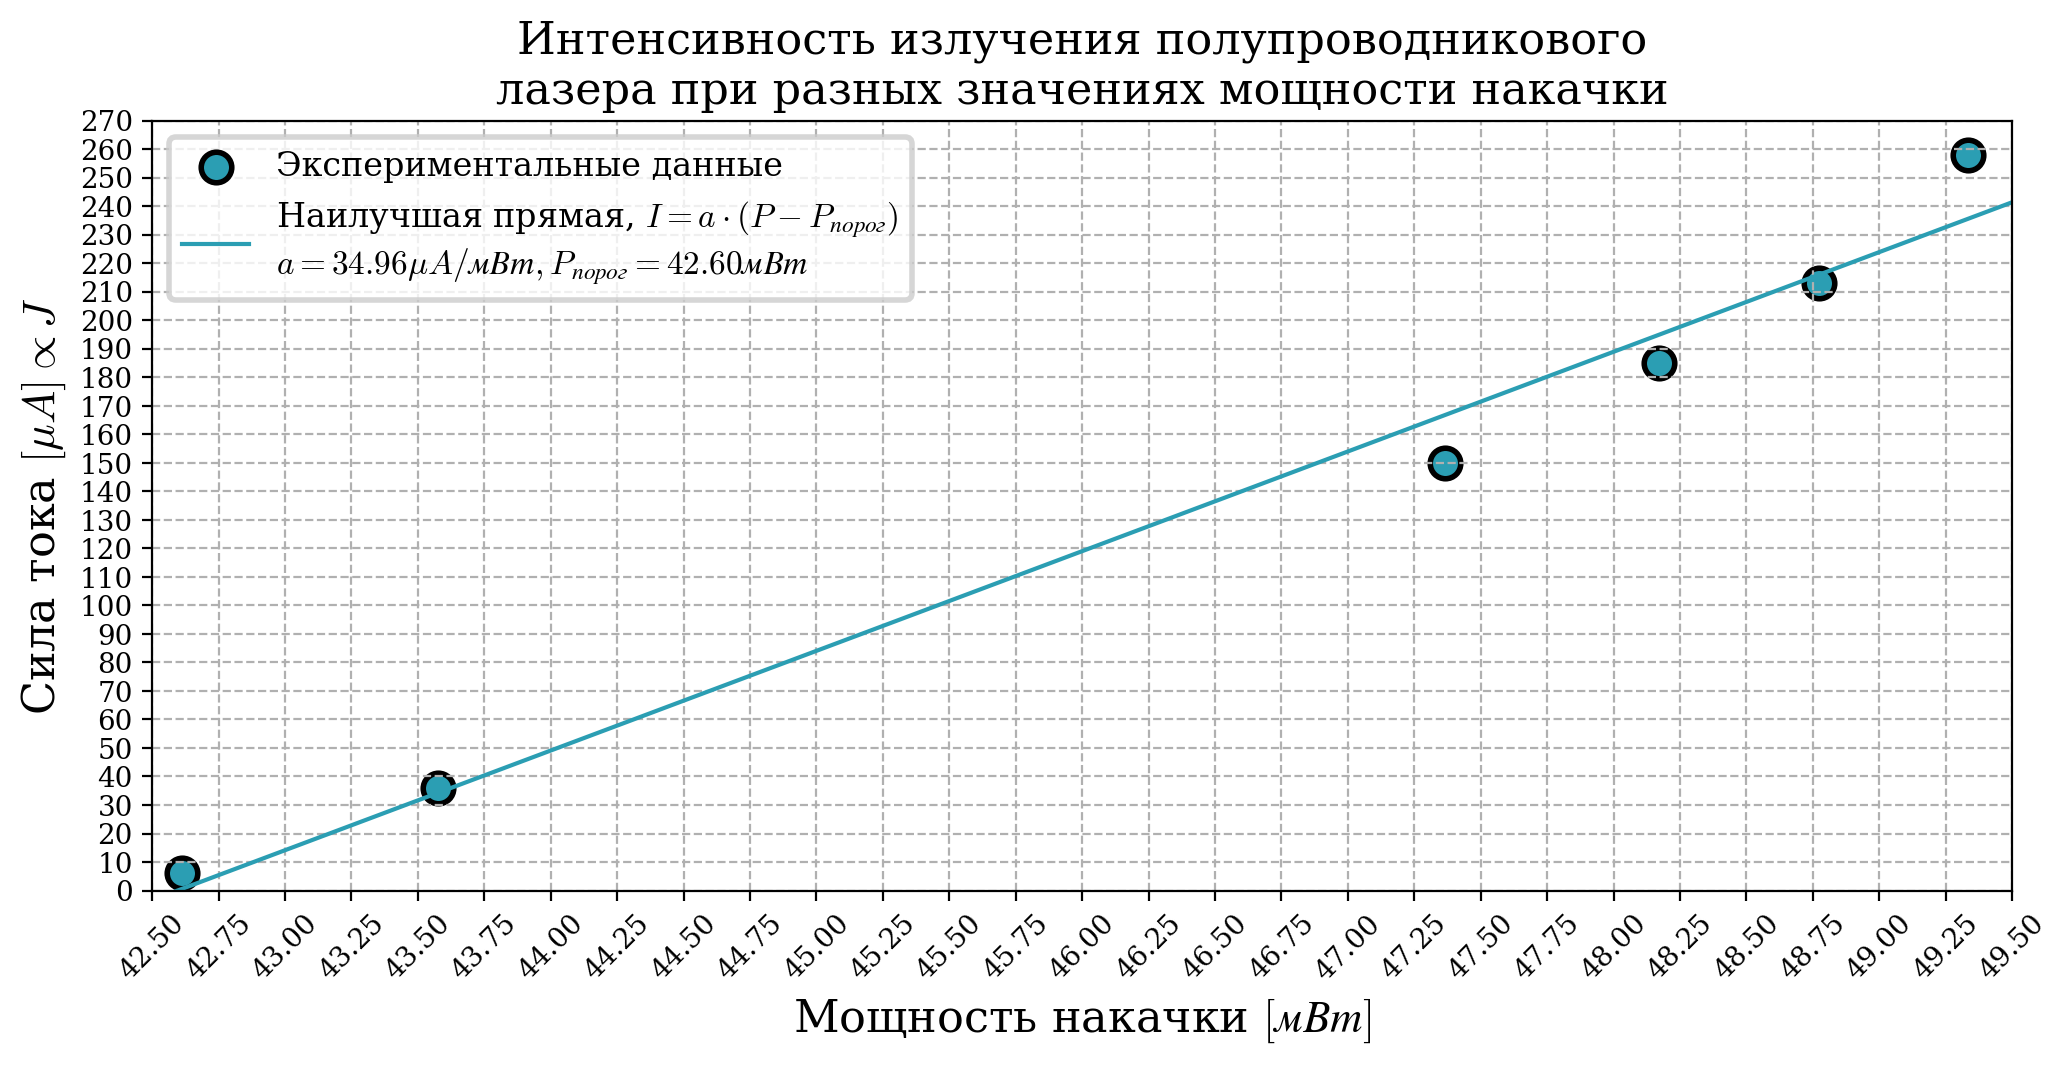

In [32]:
data = pd.read_csv(r"intensity_by_pump/lazer.csv")
P = data['Ipump[mA]'] * data['Upump[V]']


f = lambda x, a, s: a * (x - s)

param, _ = optimize.curve_fit(f, P, data['Iph[uA]'])
x_line = np.linspace(0, 100, 1000)
y_line = f(x_line, *param)


plt.scatter(P, data['Iph[uA]'], label = 'Экспериментальные данные')

plt.plot(x_line, y_line, label = f'Наилучшая прямая, $I = a \cdot (P - P_{{порог}})$\n$a = {param[0]:.2f} \mu A / мВт, P_{{порог}} = {param[1]:.2f} мВт$')
plt.xlabel("Мощность накачки $[мВт]$")
plt.ylabel("Сила тока $[\mu A] \propto J$")
plt.title("Интенсивность излучения полупроводникового\nлазера при разных значениях мощности накачки")

plt.xticks(np.arange(0, 100, 0.25), rotation = 45)
plt.xlim(42.5, 49.5)

plt.yticks(np.arange(0, 300, 10))
plt.ylim(0, 270)

plt.legend()
plt.savefig("lazer.png", bbox_inches = 'tight')

### Спектры при различных токах накачки

In [33]:
from scipy.special import wofz

<>:26: SyntaxWarning: invalid escape sequence '\l'
<>:26: SyntaxWarning: invalid escape sequence '\s'
<>:31: SyntaxWarning: invalid escape sequence '\l'
<>:31: SyntaxWarning: invalid escape sequence '\s'
<>:43: SyntaxWarning: invalid escape sequence '\p'
<>:26: SyntaxWarning: invalid escape sequence '\l'
<>:26: SyntaxWarning: invalid escape sequence '\s'
<>:31: SyntaxWarning: invalid escape sequence '\l'
<>:31: SyntaxWarning: invalid escape sequence '\s'
<>:43: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_101066/1286308311.py:26: SyntaxWarning: invalid escape sequence '\l'
  f"\n$A = {params_1[0] / 10:.2f} В, \lambda_c = {params_1[1]:.2f} нм, \sigma = {params_1[2]:.2f} нм$"
/tmp/ipykernel_101066/1286308311.py:26: SyntaxWarning: invalid escape sequence '\s'
  f"\n$A = {params_1[0] / 10:.2f} В, \lambda_c = {params_1[1]:.2f} нм, \sigma = {params_1[2]:.2f} нм$"
/tmp/ipykernel_101066/1286308311.py:31: SyntaxWarning: invalid escape sequence '\l'
  f"\n$A = {params_2[0] / 10:.2f

[300.63130936 467.52205492  10.40300848]


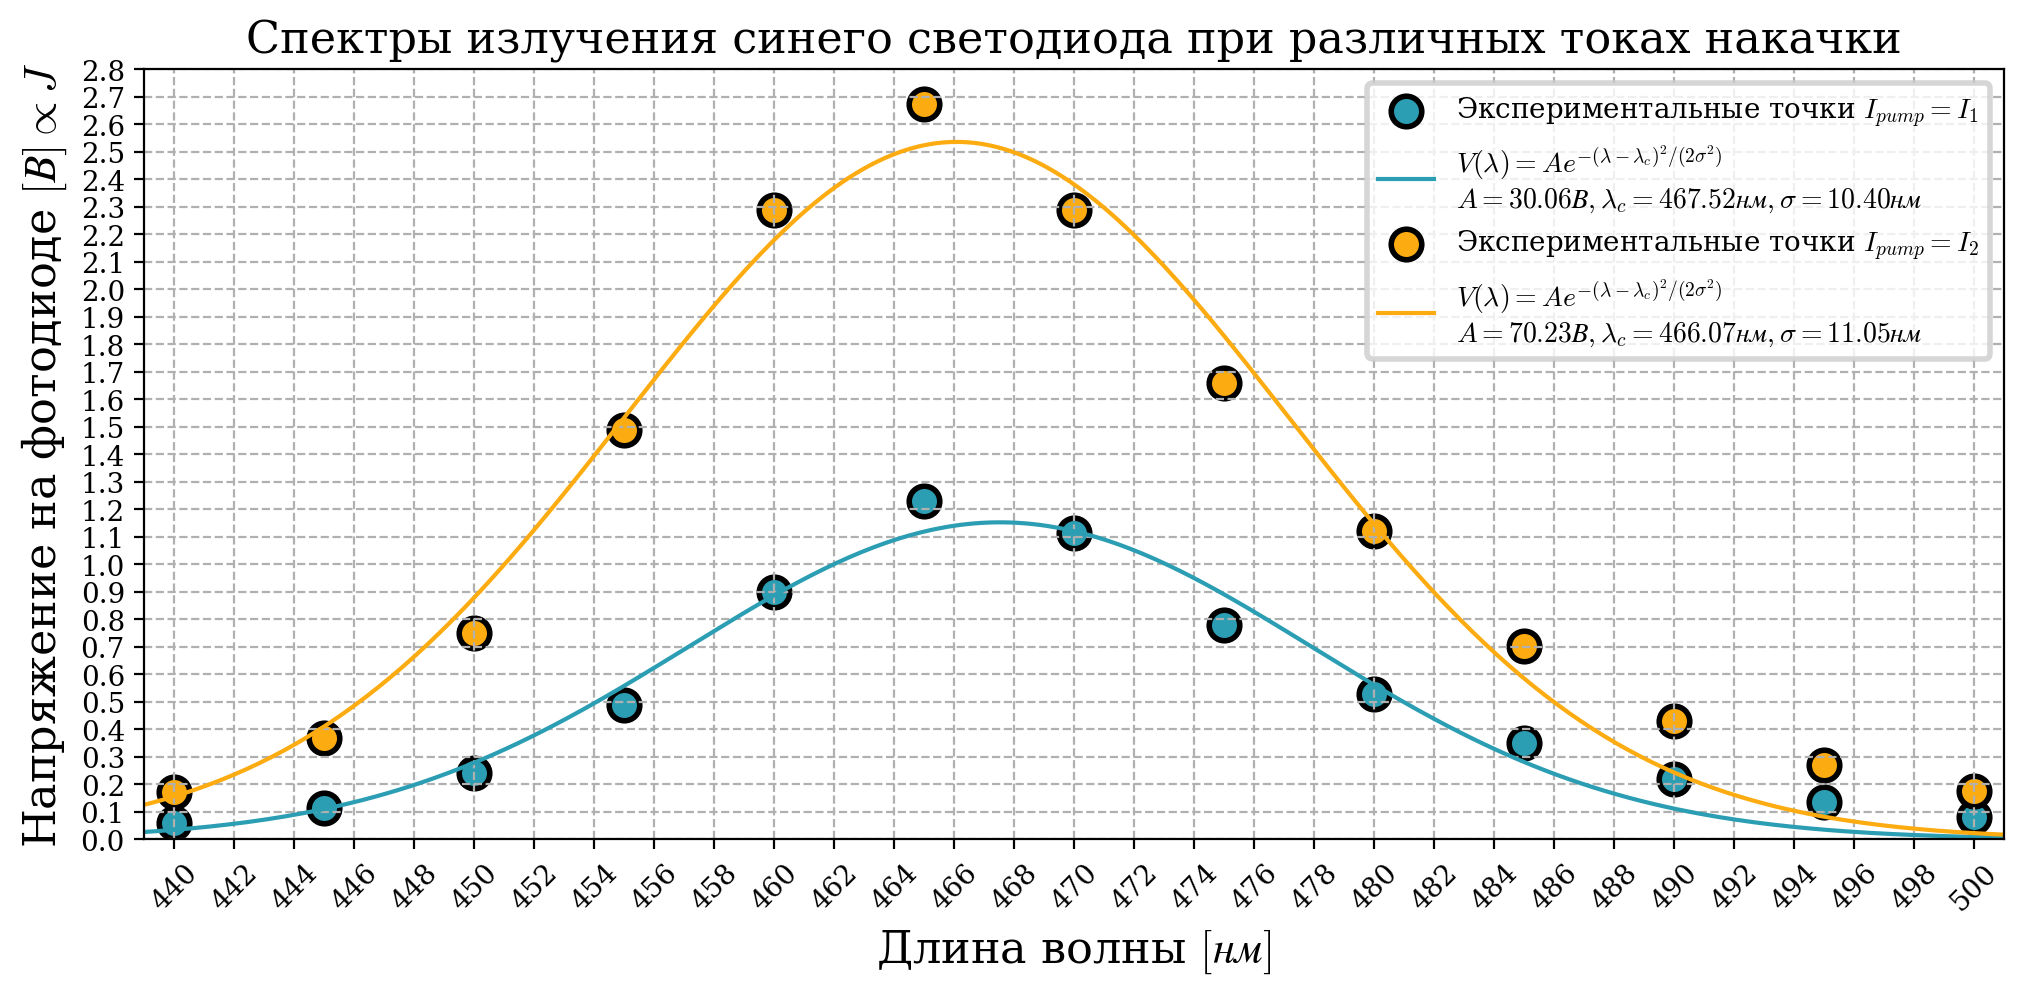

In [34]:
data = pd.read_csv("spectrums/blue.csv")
plt.figure()



def gaussian(x, amplitude, center, sigma):
    return amplitude * np.exp(-((x - center) ** 2) / (2 * sigma ** 2)) / (sigma * np.sqrt(2 * np.pi))

# Подгонка для первого набора данных
params_1, _ = optimize.curve_fit(gaussian, data['lambda[nm]'].to_numpy(), data['U1[V]'].to_numpy(), p0 = [20, 450, 5])
print(params_1)

# Подгонка для второго набора данных
params_2, _ = optimize.curve_fit(gaussian, 
                                 data['lambda[nm]'].to_numpy(), 
                                 data['U2[V]'].to_numpy(), p0 = [20, 450, 5])

x_line = np.linspace(400, 600, 1000)
y1 = gaussian(x_line, *params_1)
y2 = gaussian(x_line, *params_2)
mape = lambda y_true, y_pred: np.mean(np.abs((y_true - y_pred) / y_true)) * 100
MSE = np.mean(np.power(gaussian(data['lambda[nm]'], *params_1) - data['U1[V]'], 2))

fit_label1 = (
    r"$V(\lambda) = A e^{-(\lambda - \lambda_c)^2 / (2\sigma^2)}$"
    f"\n$A = {params_1[0] / 10:.2f} В, \lambda_c = {params_1[1]:.2f} нм, \sigma = {params_1[2]:.2f} нм$"
)

fit_label2 = (
    r"$V(\lambda) = A e^{-(\lambda - \lambda_c)^2 / (2\sigma^2)}$"
    f"\n$A = {params_2[0] / 10:.2f} В, \lambda_c = {params_2[1]:.2f} нм, \sigma = {params_2[2]:.2f} нм$"
)




plt.scatter(data['lambda[nm]'], data['U1[V]'] / 10, label='Экспериментальные точки $I_{pump} = I_1$')
plt.plot(x_line, y1 / 10, label=fit_label1)
plt.scatter(data['lambda[nm]'], data['U2[V]'] / 10, label='Экспериментальные точки $I_{pump} = I_2$')
plt.plot(x_line, y2 / 10, label=fit_label2)

plt.xlabel("Длина волны $[нм]$")
plt.ylabel("Напряжение на фотодиоде $[В] \propto J$")
plt.title("Спектры излучения синего светодиода при различных токах накачки")

plt.xticks(np.arange(300, 800, 2), rotation = 45)
plt.xlim(439, 501)

plt.yticks(np.arange(0, 30, 1 / 10))
plt.ylim(0, 28 / 10)

plt.legend(fontsize = 10)

plt.savefig("blue_gauss.png", bbox_inches = 'tight')


<>:30: SyntaxWarning: invalid escape sequence '\l'
<>:30: SyntaxWarning: invalid escape sequence '\s'
<>:30: SyntaxWarning: invalid escape sequence '\g'
<>:36: SyntaxWarning: invalid escape sequence '\l'
<>:36: SyntaxWarning: invalid escape sequence '\s'
<>:36: SyntaxWarning: invalid escape sequence '\g'
<>:47: SyntaxWarning: invalid escape sequence '\p'
<>:30: SyntaxWarning: invalid escape sequence '\l'
<>:30: SyntaxWarning: invalid escape sequence '\s'
<>:30: SyntaxWarning: invalid escape sequence '\g'
<>:36: SyntaxWarning: invalid escape sequence '\l'
<>:36: SyntaxWarning: invalid escape sequence '\s'
<>:36: SyntaxWarning: invalid escape sequence '\g'
<>:47: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_101066/1361223245.py:30: SyntaxWarning: invalid escape sequence '\l'
  f"\n$A = {params_1[0] / 10:.2f} В, \lambda_c = {params_1[1]:.2f} нм, \sigma = {params_1[2]:.2f} нм, \gamma = {params_1[3]:.2f} нм$"
/tmp/ipykernel_101066/1361223245.py:30: SyntaxWarning: invalid escap

[365.08992815 467.25720441   5.09995518   7.19627173]
0.22237866859270053
1: 0.0436137300176823
2: 0.08011160089373867


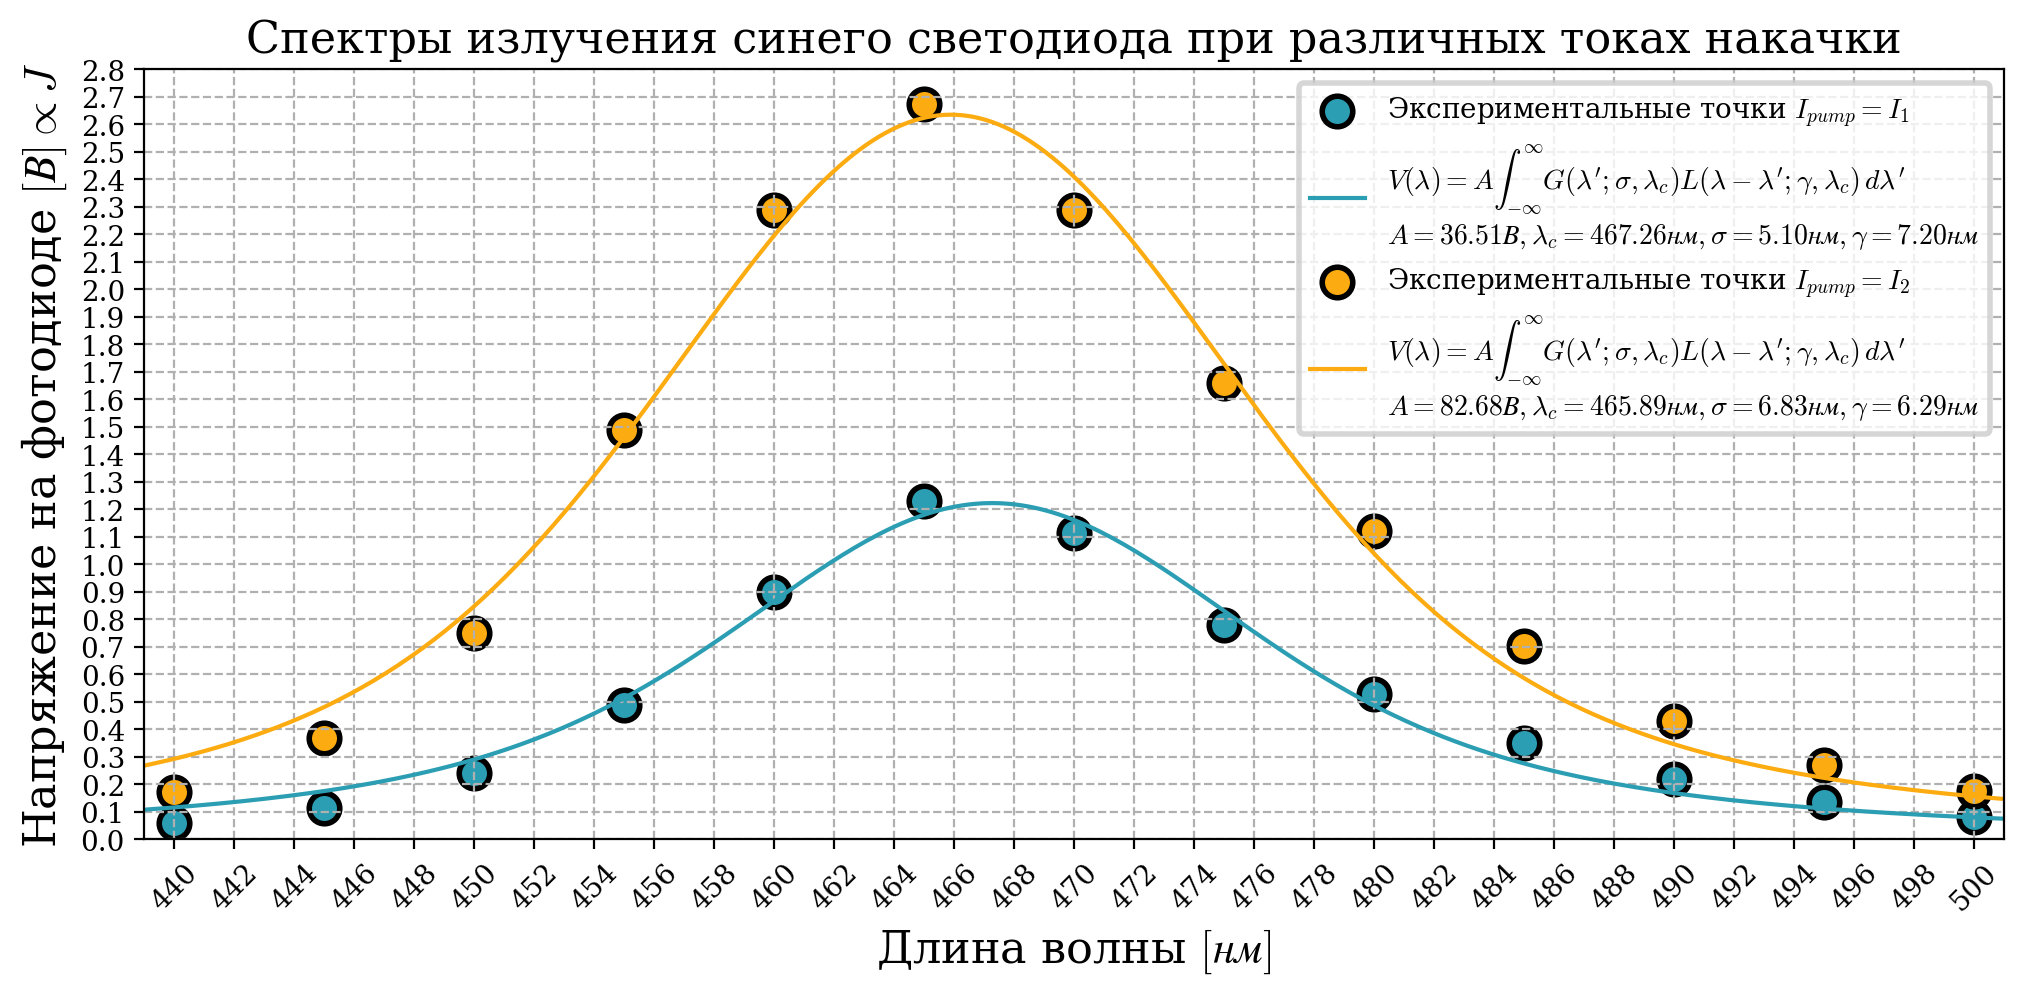

In [42]:
data = pd.read_csv("spectrums/blue.csv")
plt.figure()

def voigt(x, amplitude, center, sigma, gamma):
    z = (x - center + 1j * gamma) / (sigma * np.sqrt(2))
    return amplitude * wofz(z).real / (sigma * np.sqrt(2 * np.pi))

params_1, _ = optimize.curve_fit(voigt, data['lambda[nm]'].to_numpy(), data['U1[V]'].to_numpy())
print(params_1)
params_2, _ = optimize.curve_fit(voigt, 
                                 data['lambda[nm]'].to_numpy(), 
                                 data['U2[V]'].to_numpy(), 
                                 p0 = [100, 400, 5, 1])

x_line = np.linspace(400, 600, 1000)
y1 = voigt(x_line, *params_1)
y2 = voigt(x_line, *params_2)


MSE = np.mean(np.power(voigt(data['lambda[nm]'].to_numpy(), *params_1) - data['U1[V]'], 2))
print(MSE)
def mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))
mape = lambda y_true, y_pred: np.mean(np.abs((y_true - y_pred) / (y_true + 1e-6)))

print(f"1: {mae(data['U1[V]'].to_numpy(), voigt(data['lambda[nm]'].to_numpy(), *params_1)) / 10}")
print(f"2: {mae(data['U2[V]'].to_numpy(), voigt(data['lambda[nm]'].to_numpy(), *params_2)) / 10}")
fit_label1 = (
    r"$V(\lambda) = A \int_{-\infty}^{\infty} G(\lambda'; \sigma, \lambda_c) L(\lambda - \lambda'; \gamma, \lambda_c) \, d\lambda'$"
    f"\n$A = {params_1[0] / 10:.2f} В, \lambda_c = {params_1[1]:.2f} нм, \sigma = {params_1[2]:.2f} нм, \gamma = {params_1[3]:.2f} нм$"
)


fit_label2 = (
    r"$V(\lambda) = A \int_{-\infty}^{\infty} G(\lambda'; \sigma, \lambda_c) L(\lambda - \lambda'; \gamma, \lambda_c) \, d\lambda'$"
    f"\n$A = {params_2[0] / 10:.2f} В, \lambda_c = {params_2[1]:.2f} нм, \sigma = {params_2[2]:.2f} нм, \gamma = {params_2[3]:.2f} нм$"
)

plt.scatter(data['lambda[nm]'], data['U1[V]'] / 10, label = 'Экспериментальные точки $I_{pump} = I_1$')
plt.plot(x_line, y1 / 10, label = fit_label1)
plt.scatter(data['lambda[nm]'], data['U2[V]'] / 10, label = 'Экспериментальные точки $I_{pump} = I_2$')


plt.plot(x_line, y2 / 10, label = fit_label2)

plt.xlabel("Длина волны $[нм]$")
plt.ylabel("Напряжение на фотодиоде $[В] \propto J$")
plt.title("Спектры излучения синего светодиода при различных токах накачки")

plt.xticks(np.arange(300, 800, 2), rotation = 45)
plt.xlim(439, 501)

plt.yticks(np.arange(0, 30, 1 /10))
plt.ylim(0, 28 / 10)

plt.legend(fontsize = 10)

plt.savefig("blue.png", bbox_inches = 'tight')

<>:26: SyntaxWarning: invalid escape sequence '\l'
<>:26: SyntaxWarning: invalid escape sequence '\s'
<>:26: SyntaxWarning: invalid escape sequence '\g'
<>:32: SyntaxWarning: invalid escape sequence '\l'
<>:32: SyntaxWarning: invalid escape sequence '\s'
<>:32: SyntaxWarning: invalid escape sequence '\g'
<>:38: SyntaxWarning: invalid escape sequence '\l'
<>:38: SyntaxWarning: invalid escape sequence '\s'
<>:38: SyntaxWarning: invalid escape sequence '\g'
<>:58: SyntaxWarning: invalid escape sequence '\p'
<>:26: SyntaxWarning: invalid escape sequence '\l'
<>:26: SyntaxWarning: invalid escape sequence '\s'
<>:26: SyntaxWarning: invalid escape sequence '\g'
<>:32: SyntaxWarning: invalid escape sequence '\l'
<>:32: SyntaxWarning: invalid escape sequence '\s'
<>:32: SyntaxWarning: invalid escape sequence '\g'
<>:38: SyntaxWarning: invalid escape sequence '\l'
<>:38: SyntaxWarning: invalid escape sequence '\s'
<>:38: SyntaxWarning: invalid escape sequence '\g'
<>:58: SyntaxWarning: invalid e

[6.79157727e+01 6.22734681e+02 3.47632007e-04 1.41941318e+01]
1: 0.058137122495108454
2: 0.07304729085192452
3: 0.04862463354286397


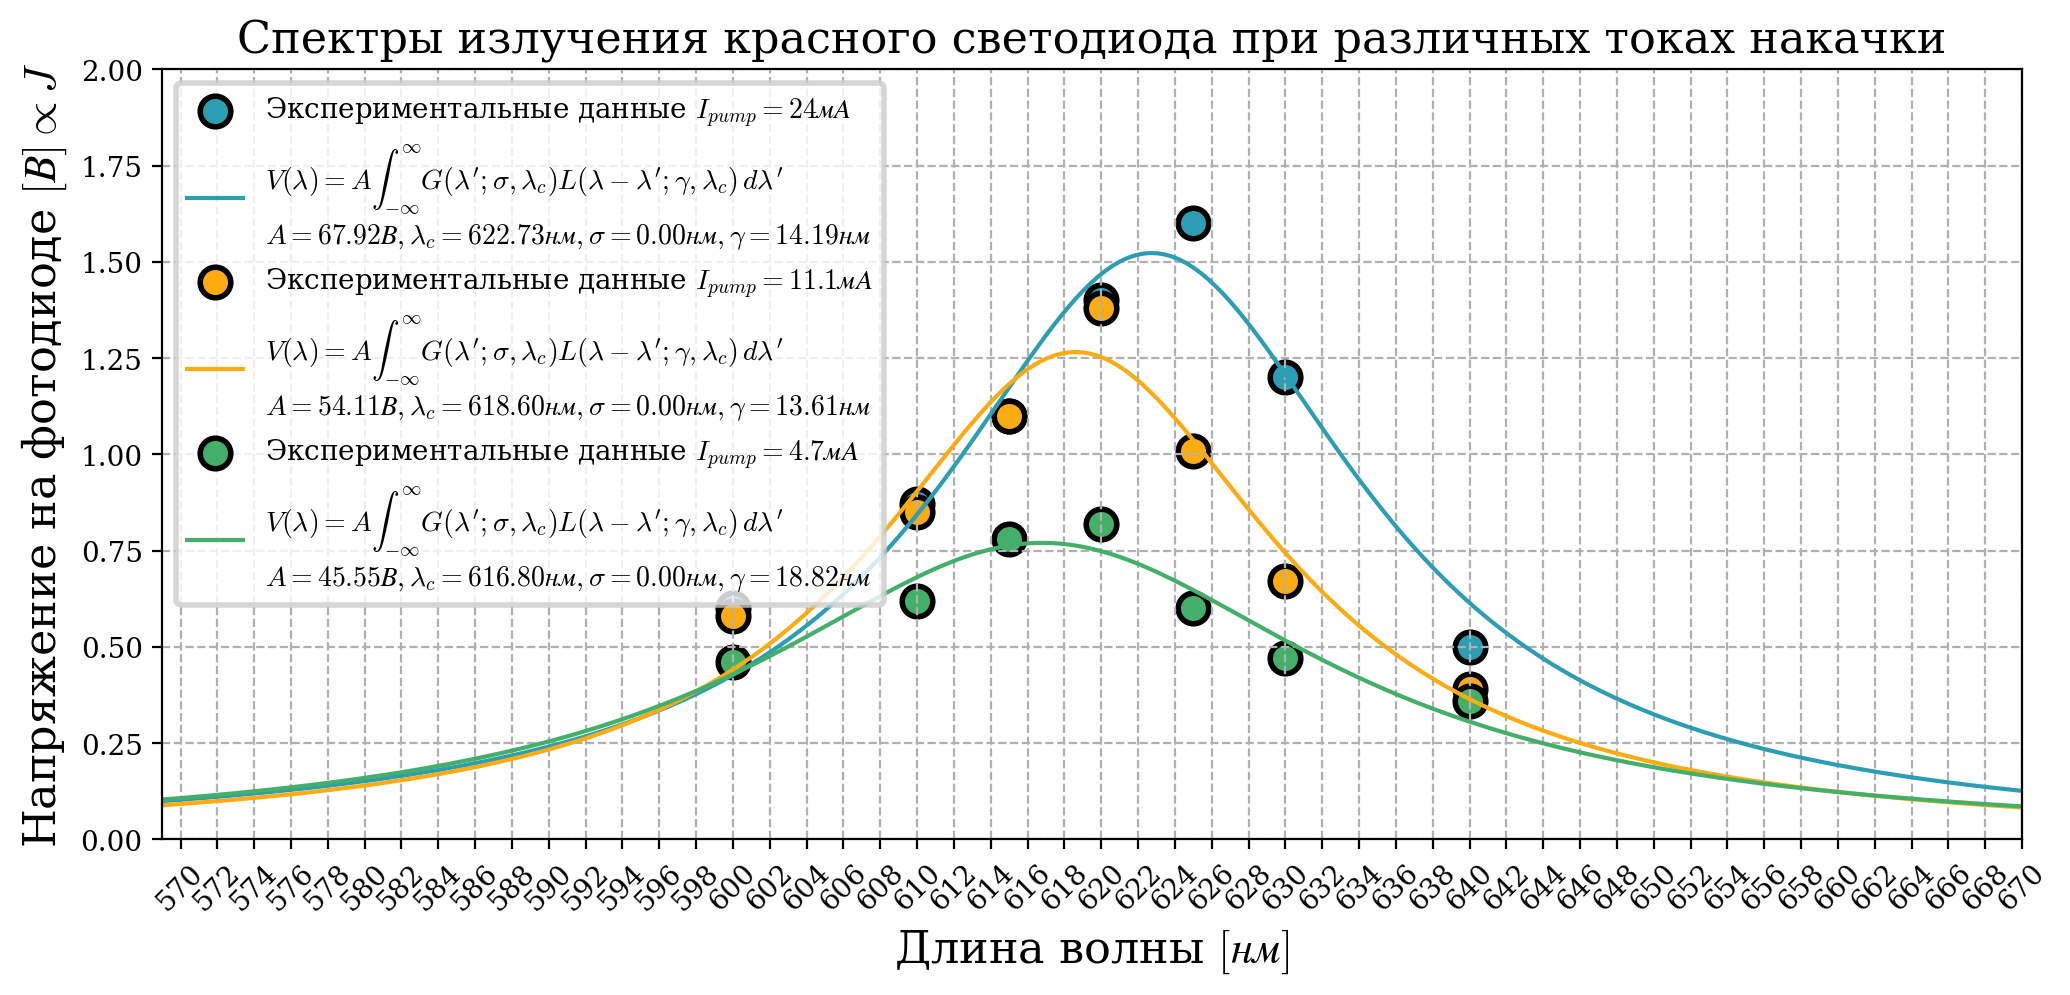

In [40]:
data = pd.read_csv("spectrums/red.csv")

data_2 = pd.read_csv("spectrums/red_2.csv")

params_1, _ = optimize.curve_fit(voigt, data_2['lambda[nm]'].to_numpy(), data_2['U1[V]'].to_numpy(), p0 = [40, 624, 5, 1])
print(params_1)
params_2, _ = optimize.curve_fit(voigt, 
                                 data_2['lambda[nm]'].to_numpy(), 
                                 data_2['U2[V]'].to_numpy(),
                                p0 = [1.2, 620, 10, 1])

params_3, _ = optimize.curve_fit(voigt, 
                                 data_2['lambda[nm]'].to_numpy(), 
                                 data_2['U3[V]'].to_numpy(),
                                p0 = [0.6, 620, 10, 1])

x_line = np.linspace(400, 800, 1000)
y1 = voigt(x_line, *params_1)
y2 = voigt(x_line, *params_2)
y3 = voigt(x_line, *params_3)



fit_label1 = (
    r"$V(\lambda) = A \int_{-\infty}^{\infty} G(\lambda'; \sigma, \lambda_c) L(\lambda - \lambda'; \gamma, \lambda_c) \, d\lambda'$"
    f"\n$A = {params_1[0]:.2f} В, \lambda_c = {params_1[1]:.2f} нм, \sigma = {params_1[2]:.2f} нм, \gamma = {params_1[3]:.2f} нм$"
)


fit_label2 = (
    r"$V(\lambda) = A \int_{-\infty}^{\infty} G(\lambda'; \sigma, \lambda_c) L(\lambda - \lambda'; \gamma, \lambda_c) \, d\lambda'$"
    f"\n$A = {params_2[0]:.2f} В, \lambda_c = {params_2[1]:.2f} нм, \sigma = {params_2[2]:.2f} нм, \gamma = {params_2[3]:.2f} нм$"
)


fit_label3 = (
    r"$V(\lambda) = A \int_{-\infty}^{\infty} G(\lambda'; \sigma, \lambda_c) L(\lambda - \lambda'; \gamma, \lambda_c) \, d\lambda'$"
    f"\n$A = {params_3[0]:.2f} В, \lambda_c = {params_3[1]:.2f} нм, \sigma = {params_3[2]:.2f} нм, \gamma = {params_3[3]:.2f} нм$"
)



print(f"1: {mae(data['U1[V]'], voigt(data['lambda[nm]'].to_numpy(), *params_1))}")
print(f"2: {mae(data['U2[V]'], voigt(data['lambda[nm]'].to_numpy(), *params_2))}")
print(f"3: {mae(data['U3[V]'], voigt(data['lambda[nm]'].to_numpy(), *params_3))}")

plt.scatter(data_2['lambda[nm]'], data_2['U1[V]'], label = 'Экспериментальные данные $I_{{pump}} = 24 мА$')
plt.plot(x_line, y1, label = fit_label1)

plt.scatter(data_2['lambda[nm]'], data_2['U2[V]'], label = 'Экспериментальные данные $I_{{pump}} = 11.1 мА$')
plt.plot(x_line, y2, label = fit_label2)

plt.scatter(data_2['lambda[nm]'], data_2['U3[V]'], label = 'Экспериментальные данные $I_{{pump}} = 4.7 мА$')
plt.plot(x_line, y3, label = fit_label3)


plt.xlabel("Длина волны $[нм]$")
plt.ylabel("Напряжение на фотодиоде $[В] \propto J$")
plt.title("Спектры излучения красного светодиода при различных токах накачки")
plt.xticks(np.arange(300, 800, 2), rotation = 45)
plt.xlim(569, 670)

plt.ylim(0, 2)
plt.legend(fontsize = 10)
plt.savefig("red.png", bbox_inches = 'tight')

<>:67: SyntaxWarning: invalid escape sequence '\l'
<>:67: SyntaxWarning: invalid escape sequence '\s'
<>:67: SyntaxWarning: invalid escape sequence '\g'
<>:73: SyntaxWarning: invalid escape sequence '\l'
<>:73: SyntaxWarning: invalid escape sequence '\s'
<>:73: SyntaxWarning: invalid escape sequence '\g'
<>:88: SyntaxWarning: invalid escape sequence '\p'
<>:67: SyntaxWarning: invalid escape sequence '\l'
<>:67: SyntaxWarning: invalid escape sequence '\s'
<>:67: SyntaxWarning: invalid escape sequence '\g'
<>:73: SyntaxWarning: invalid escape sequence '\l'
<>:73: SyntaxWarning: invalid escape sequence '\s'
<>:73: SyntaxWarning: invalid escape sequence '\g'
<>:88: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_101066/2114242042.py:67: SyntaxWarning: invalid escape sequence '\l'
  f"\n$A = {best_params1[0]:.2f} В, \lambda_c = {best_params1[1]:.2f} нм, \sigma = {best_params1[2]:.2f} нм, \gamma = {best_params1[3]:.2f} нм$"
/tmp/ipykernel_101066/2114242042.py:67: SyntaxWarning: in

Ura 22.110100813211684
Ura 0.07756027639527513
Ura 0.07756027639526901
[989.63796481 513.17739791  13.65943183  10.23602069]
URA 0.020737148814550056
URA 0.020737148813749016
URA 0.020737148813457486
URA 0.020737148813223163
URA 0.020737148813201
URA 0.02073714881318148
URA 0.020737148813179326
1: 6.118597440773752
2: 4.42014350500354


/tmp/ipykernel_101066/2114242042.py:41: OptimizeWarning: Covariance of the parameters could not be estimated
  params_1, _ = optimize.curve_fit(
/tmp/ipykernel_101066/1062298698.py:6: RuntimeWarning: overflow encountered in multiply
  return amplitude * wofz(z).real / (sigma * np.sqrt(2 * np.pi))


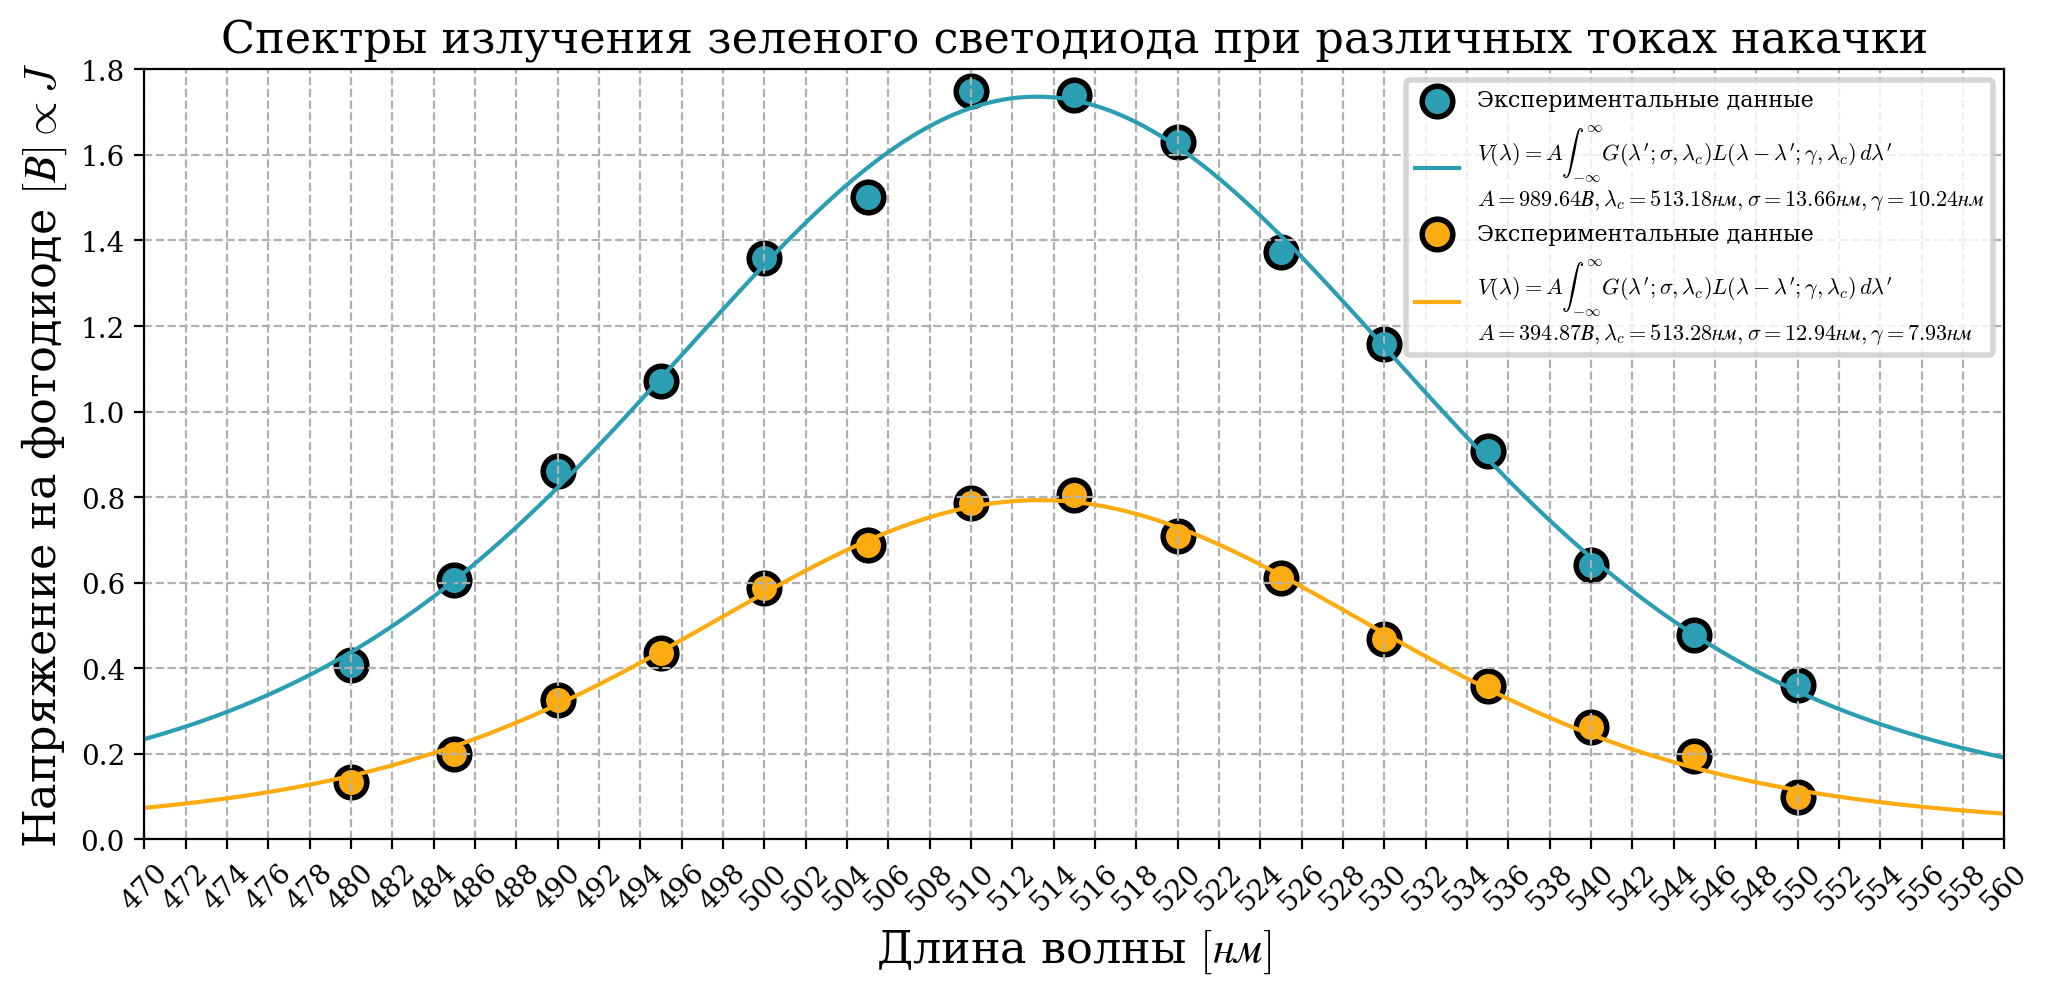

In [41]:
data = pd.read_csv("spectrums/green.csv")


best_params1 = None
best_error = np.inf

for param3 in np.arange(0, 4, 0.2):
    for param4 in np.arange(0, 4, 0.5):
        current_p0 = [514, 18, param3, param4]
        
        try:
            params_1, _ = optimize.curve_fit(
                voigt, 
                data['lambda[nm]'].to_numpy(), 
                data['U1[V]'].to_numpy(), 
                p0=current_p0, 
                maxfev=int(1e4))
            
    
            y_pred = voigt(data['lambda[nm]'].to_numpy(), *params_1)
            error = np.mean((y_pred - data['U1[V]'].to_numpy())**2)
            
        
            if error and error < best_error:
                best_error = error
                best_params1 = np.copy(params_1)
                print(f"Ura {error}")
                
        except Exception as e:
            continue
print(best_params1)

best_params2 = None
best_error = np.inf

for param3 in np.arange(0, 10, 1):
    for param4 in np.arange(0, 10, 1):
        current_p0 = [100, 514, param3, param4]
        
        try:
            params_1, _ = optimize.curve_fit(
                voigt, 
                data['lambda[nm]'].to_numpy(), 
                data['U2[V]'].to_numpy(), 
                p0=current_p0, 
                maxfev=int(1e4))
            
      
            y_pred = voigt(data['lambda[nm]'].to_numpy(), *params_1)
            error = np.mean((y_pred - data['U2[V]'].to_numpy())**2)
            
            if error and error < best_error:
                best_error = error
                best_params2 = params_1.copy()
                print(f"URA {error}")
        except Exception as e:
            continue


x_line = np.linspace(400, 600, 1000)
y1 = voigt(x_line, *best_params1)
y2 = voigt(x_line, *best_params2)


fit_label1 = (
    r"$V(\lambda) = A \int_{-\infty}^{\infty} G(\lambda'; \sigma, \lambda_c) L(\lambda - \lambda'; \gamma, \lambda_c) \, d\lambda'$"
    f"\n$A = {best_params1[0]:.2f} В, \lambda_c = {best_params1[1]:.2f} нм, \sigma = {best_params1[2]:.2f} нм, \gamma = {best_params1[3]:.2f} нм$"
)


fit_label2 = (
    r"$V(\lambda) = A \int_{-\infty}^{\infty} G(\lambda'; \sigma, \lambda_c) L(\lambda - \lambda'; \gamma, \lambda_c) \, d\lambda'$"
    f"\n$A = {best_params2[0]:.2f} В, \lambda_c = {best_params2[1]:.2f} нм, \sigma = {best_params2[2]:.2f} нм, \gamma = {best_params2[3]:.2f} нм$"
)
print(f"1: {mae(data['U1[V]'], voigt(data['lambda[nm]'].to_numpy(), *params_1))}")
print(f"2: {mae(data['U2[V]'], voigt(data['lambda[nm]'].to_numpy(), *params_2))}")

plt.figure()


plt.scatter(data['lambda[nm]'], data['U1[V]'] / 10, label = 'Экспериментальные данные')
plt.plot(x_line, y1 / 10, label = fit_label1)

plt.scatter(data['lambda[nm]'], data['U2[V]'] / 10, label = 'Экспериментальные данные')
plt.plot(x_line, y2 / 10, label = fit_label2)

plt.xlabel("Длина волны $[нм]$")
plt.ylabel("Напряжение на фотодиоде $[В] \propto J$")
plt.title("Спектры излучения зеленого светодиода при различных токах накачки")
plt.xticks(np.arange(400, 600, 2), rotation = 45)
plt.xlim(470, 560)

plt.ylim(0, 18 / 10)

plt.legend(fontsize = 8)

plt.savefig("green.png", bbox_inches = 'tight')